## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Tweet Twitter terkait COVID-19 periode April hingga Juni 2021. 
##### 1. Analisis Sentimen terhadap Tweet terkait COVID-19. Data Tweet yang dikumpulkan selama periode April hingga Juni 2021. Tujuan Analisis	Untuk mengidentifikasi dan mengukur opini (positif, negatif, atau netral) publik di Twitter mengenai pandemi COVID-19 selama periode tersebut. Kolom Teks Utama	original_text (teks asli) . Data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Berikut merupakan penjelasan untuk kolom-kolom kunci:
1. ID unik dari tweet tersebut.
2. created_at  Tanggal dan waktu tweet dibuat.
3. original_text teks tweet yang sebenarnya (sebelum pembersihan).Ini adalah kolom utama yang akan dianalisis.
4. clean_tweet teks tweet setelah melalui proses cleaning (menghilangkan link, tanda baca, dsb.). 
5. original_author  Pengguna yang membuat tweet tersebut.
6. retweet_count  Engagement Jumlah retweet yang diterima tweet tersebut.
7. favorite_count  Engagement Jumlah like (favorite) yang diterima tweet tersebut.
8. ompound  Skor sentimen gabungan (biasanya antara -1.0 dan 1.0), digunakan untuk menentukan polaritas.
9. neg Hasil  sentimen negatif (antara 0 dan 1).
10. neu Hasil  sentimen netral (antara 0 dan 1).
11. pos Hasil  sentimen positif (antara 0 dan 1).
12. sentiment Label polaritas akhir (misalnya, 'Positif', 'Negatif', 'Netral') yang diturunkan dari skor-skor di atas.

##### 3. Import Library

In [1]:
# 3. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter

# Preprocessing Teks
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Feature Extraction & Modeling (Scikit-learn)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    print(" NLTK Resources berhasil diunduh.")
    
except Exception as e:
    print(f" Gagal mengunduh NLTK Resources: {e}")

 NLTK Resources berhasil diunduh.


[nltk_data] Downloading package punkt to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4. Load Data

In [4]:

#Load Data
file_name = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' 

try:
    data = pd.read_csv(file_name)
    print(f"File '{file_name}' berhasil dimuat.")
    print("\n===== 5 BARIS PERTAMA DATA =====")
    print(data.head())
    
except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan. Pastikan file berada di direktori yang sama.")


def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['tweets_clean'] = data['original_text'].apply(clean_text) 

print(" Kolom 'tweets_clean' berhasil dibuat.")
print(data[['original_text', 'tweets_clean']].head())

File 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' berhasil dimuat.

===== 5 BARIS PERTAMA DATA =====
                    id  created_at  \
0  1386694264550270000  2021-04-26   
1  1386694260213170000  2021-04-26   
2  1386694256413320000  2021-04-26   
3  1386694252017630000  2021-04-26   
4  1386694248284700000  2021-04-26   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="https://mobile.twitter.com" rel="nofo...   
4  <a href="https://mobile.twitter.com" rel="nofo...   

                                       original_text lang  favorite_count  \
0  RT @VP: The U.S. is working closely with the I...   en             0.0   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   en             0.0   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   en             0.0   
3  RT @itsaadee: Praying

## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [12]:
# 1. Jumlah baris data
jumlah_baris, jumlah_kolom = data.shape 

print(f"Total baris data (Jumlah Tweets): {jumlah_baris}")
print(f"Total kolom data: {jumlah_kolom}")
# 2. Panjang rata-rata setiap baris
data['char_count'] = data['original_text'].apply(len)

Total baris data (Jumlah Tweets): 147475
Total kolom data: 19


#### 2. Panjang Rata - Rata Setiap Baris

In [14]:

# 2. Hitung jumlah kata di setiap baris
data['word_count'] = data['original_text'].apply(lambda x: len(str(x).split()))

# Hitung Rata-rata
avg_char = data['char_count'].mean()
avg_word = data['word_count'].mean()

print("\n===== PANJANG RATA-RATA TEKS =====")
print(f"Panjang rata-rata teks (berdasarkan karakter): {avg_char:.2f} karakter")
print(f"Panjang rata-rata teks (berdasarkan kata): {avg_word:.2f} kata")


===== PANJANG RATA-RATA TEKS =====
Panjang rata-rata teks (berdasarkan karakter): 131.62 karakter
Panjang rata-rata teks (berdasarkan kata): 18.85 kata


#### 3. Cek Data Duplikasi

In [17]:
# 3. Cek data duplikasi
duplicate_rows = data.duplicated(subset=['original_text']).sum()

print(f"Jumlah baris data duplikat (berdasarkan kolom 'original_text'): {duplicate_rows}")

if duplicate_rows > 0:
    # Hapus data duplikat, hanya mempertahankan yang pertama
    data.drop_duplicates(subset=['original_text'], keep='first', inplace=True)
    
    print(f"Duplikasi berhasil dihapus. Jumlah data sekarang: {len(data)}")
else:
    print("Data tidak memiliki duplikasi pada kolom 'original_text'.")

Jumlah baris data duplikat (berdasarkan kolom 'original_text'): 0
Data tidak memiliki duplikasi pada kolom 'original_text'.


#### 4. Cek Data Kosong

In [19]:
# 4. Cekdata kosong
print("\n===== CEK DATA KOSONG (MISSING VALUES) =====")

missing_values = data.isnull().sum()
print(missing_values)

if data['original_text'].isnull().sum() > 0 or data['created_at'].isnull().sum() > 0:
    data.dropna(subset=['original_text', 'created_at'], inplace=True)
    print(f"\n Baris dengan nilai kosong di 'original_text' atau 'created_at' telah dihapus. Jumlah data sekarang: {len(data)}")
else:
    print("\nData sudah bersih dari nilai kosong pada kolom 'original_text' dan 'created_at'.")


===== CEK DATA KOSONG (MISSING VALUES) =====
id                      0
created_at              0
source                  0
original_text           0
lang                    1
favorite_count          1
retweet_count           1
original_author         1
hashtags           109056
user_mentions       46838
place               44819
clean_tweet           948
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
tweets_clean            0
char_count              0
word_count              0
dtype: int64

Data sudah bersih dari nilai kosong pada kolom 'original_text' dan 'created_at'.


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

Bar chart distribusi sentimen telah dibuat dan disimpan sebagai 'sentiment_distribution.png'.
Bar chart 20 kata paling sering muncul telah dibuat dan disimpan sebagai 'top_words_bar_chart.png'.

Top 20 Kata Paling Sering Muncul:
           Word  Count
0            rt  82333
1      covid-19  57604
2       vaccine  11486
3           new  11112
4             -   8119
5         cases   7872
6        people   7330
7         &amp;   7165
8      #covid19   5799
9        health   5567
10       #covid   5174
11          get   5101
12          may   4620
13  vaccination   4213
14     vaccines   4193
15           us   4061
16           19   3968
17          one   3857
18     pandemic   3832
19        india   3811


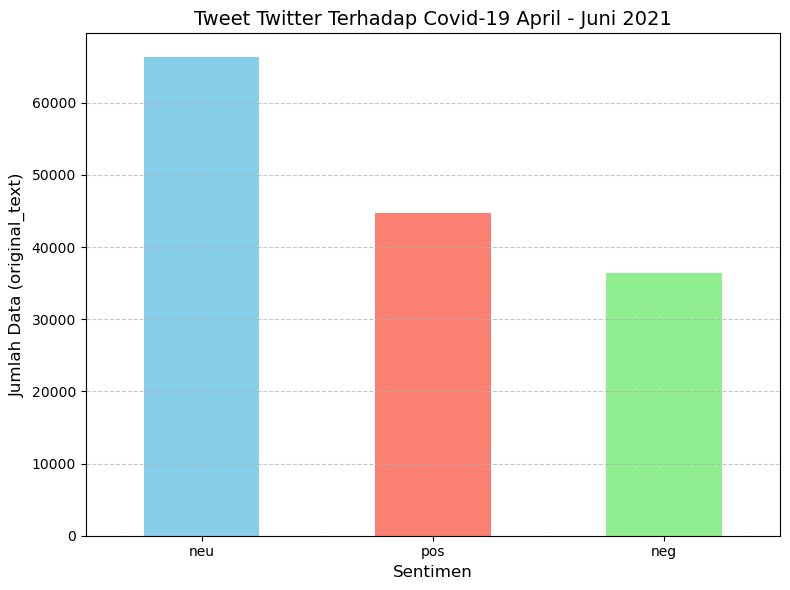

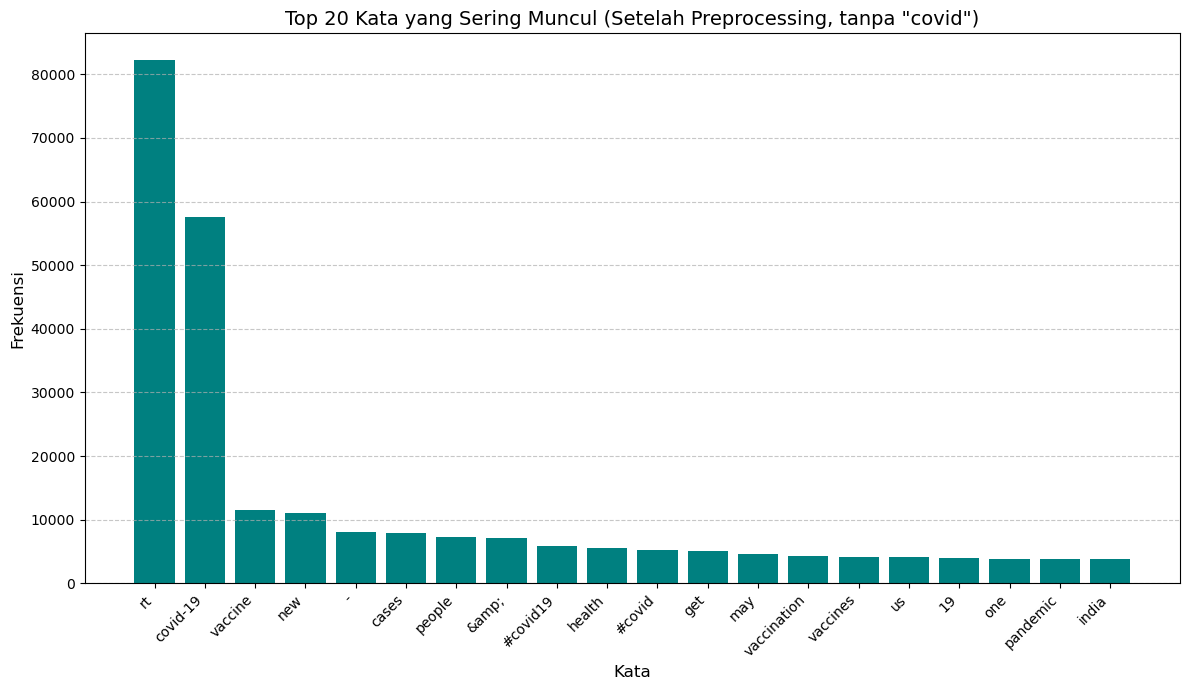

In [45]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# 2. Ensure consistency by dropping any NaN/missing values in 'labels' before counting
data.dropna(subset=['sentiment'], inplace=True)

# 3. Calculate sentiment distribution
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
# Plotting the counts, sorted by count in descending order
sentiment_counts.sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Tweet Twitter Terhadap Covid-19 April - Juni 2021', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Data (original_text)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_distribution.png')
print("Bar chart distribusi sentimen telah dibuat dan disimpan sebagai 'sentiment_distribution.png'.")

# Apply Cleaning
data['tweets_clean'] = data['original_text'].apply(clean_text)

# Define remove_stopwords (re-defined here to ensure it runs)
english_stopwords = stopwords.words('english')

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in english_stopwords and word != 'covid'] # Exclude 'chatgpt' to see other topic words
    return ' '.join(filtered_tokens)

# Apply Stopword Removal (and exclude 'covid' which will dominate the count)
data['tweets_final'] = data['tweets_clean'].apply(remove_stopwords)

# Combine all final text into one string for Word Cloud
all_text = ' '.join(data['tweets_final'])

# Calculate the frequency of the top 20 words
from collections import Counter
word_counts = Counter(all_text.split())
top_20_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# --- Bar Chart for Top 20 Words ---
plt.figure(figsize=(12, 7))
plt.bar(top_20_words['Word'], top_20_words['Count'], color='teal')
plt.title('Top 20 Kata yang Sering Muncul (Setelah Preprocessing, tanpa "covid")', fontsize=14)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('top_words_bar_chart.png')
print("Bar chart 20 kata paling sering muncul telah dibuat dan disimpan sebagai 'top_words_bar_chart.png'.")

# Print the top words data (optional, but good for understanding)
print("\nTop 20 Kata Paling Sering Muncul:")
print(top_20_words)



In [46]:


def clean_text(text):
    text = str(text).lower() 
    return text

data['tweets_clean'] = data['original_text'].apply(clean_text) 
print("Kolom 'tweets_clean' berhasil dibuat.")

print(data.columns)

print(data[['original_text', 'tweets_clean']].head())

Kolom 'tweets_clean' berhasil dibuat.
Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment',
       'tweets_clean', 'char_count', 'word_count', 'tweets_final',
       'tweets_tokenized', 'tweets_lemmatized', 'tweets_stemmed',
       'tweets_normalized', 'label_numeric'],
      dtype='object')
                                       original_text  \
0  RT @VP: The U.S. is working closely with the I...   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   
3  RT @itsaadee: Praying for #India as the countr...   
4  Rapid Investment in Nursing to Strengthen the ...   

                                        tweets_clean  
0  rt @vp: the u.s. is working closely with the i...  
1  rt @jackposobiec: flip-flop fauci admits outdo...  
2  rt @timmy315: hi twitter, i

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [47]:
def tokenize_simple(text):
    text = str(text) 
    return text.split() 

data['tweets_tokenized'] = data['tweets_clean'].apply(tokenize_simple)

print(" Tokenisasi berhasil.")
print(data[['tweets_clean', 'tweets_tokenized']].head())


 Tokenisasi berhasil.
                                        tweets_clean  \
0  rt @vp: the u.s. is working closely with the i...   
1  rt @jackposobiec: flip-flop fauci admits outdo...   
2  rt @timmy315: hi twitter, i’m tim manning, the...   
3  rt @itsaadee: praying for #india as the countr...   
4  rapid investment in nursing to strengthen the ...   

                                    tweets_tokenized  
0  [rt, @vp:, the, u.s., is, working, closely, wi...  
1  [rt, @jackposobiec:, flip-flop, fauci, admits,...  
2  [rt, @timmy315:, hi, twitter,, i’m, tim, manni...  
3  [rt, @itsaadee:, praying, for, #india, as, the...  
4  [rapid, investment, in, nursing, to, strengthe...  


#### 2. Lemmatization 

In [48]:
# 2. Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

try:
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    print("NLTK Lemmatization resources berhasil diunduh.")
except Exception as e:
    print(f"Gagal mengunduh NLTK Lemmatization resources: {e}")

# Inisialisasi Lemmatizer
lemmatizer = WordNetLemmatizer()

def perform_lemmatization(text):
    # Lakukan tokenisasi sederhana (menggunakan hasil dari tweets_final)
    tokens = text.split() 
    
    # Lemmatization per kata
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Gabungkan kembali
    return ' '.join(lemmatized_tokens)

# Terapkan lemmatization pada kolom teks yang sudah bersih (tweets_final)
data['tweets_lemmatized'] = data['tweets_final'].apply(perform_lemmatization)

print("\n Lemmatization berhasil. Contoh Hasil:")
print(data[['tweets_final', 'tweets_lemmatized']].head())

[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK Lemmatization resources berhasil diunduh.

 Lemmatization berhasil. Contoh Hasil:
                                        tweets_final  \
0  rt @vp: u.s. working closely indian government...   
1  rt @jackposobiec: flip-flop fauci admits outdo...   
2  rt @timmy315: hi twitter, i’m tim manning, whi...   
3  rt @itsaadee: praying #india country battles w...   
4  rapid investment nursing strengthen global cov...   

                                   tweets_lemmatized  
0  rt @vp: u.s. working closely indian government...  
1  rt @jackposobiec: flip-flop fauci admits outdo...  
2  rt @timmy315: hi twitter, i’m tim manning, whi...  
3  rt @itsaadee: praying #india country battle wo...  
4  rapid investment nursing strengthen global cov...  


#### 3. Stemming

In [50]:
# 3. Stemming

import nltk
from nltk.stem import PorterStemmer

# Inisialisasi Porter Stemmer
stemmer = PorterStemmer()

def perform_stemming(text):
    # Lakukan tokenisasi sederhana
    tokens = text.split() 
    
    # Stemming per kata
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Gabungkan kembali
    return ' '.join(stemmed_tokens)

data['tweets_stemmed'] = data['tweets_final'].apply(perform_stemming)

print("\n Stemming berhasil. Contoh Hasil:")
print(data[['tweets_final', 'tweets_stemmed']].head())


 Stemming berhasil. Contoh Hasil:
                                        tweets_final  \
0  rt @vp: u.s. working closely indian government...   
1  rt @jackposobiec: flip-flop fauci admits outdo...   
2  rt @timmy315: hi twitter, i’m tim manning, whi...   
3  rt @itsaadee: praying #india country battles w...   
4  rapid investment nursing strengthen global cov...   

                                      tweets_stemmed  
0  rt @vp: u.s. work close indian govern rapidli ...  
1  rt @jackposobiec: flip-flop fauci admit outdoo...  
2  rt @timmy315: hi twitter, i’m tim manning, whi...  
3  rt @itsaadee: pray #india countri battl worst ...  
4  rapid invest nurs strengthen global covid-19 r...  


#### 4. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [51]:
# 4. Stopword removal (Tanda baca, angka dan kata)
english_stopwords = stopwords.words('english')

def remove_stopwords_and_finalize(text):
    tokens = text.split() 
    # BAGIAN INI: Membandingkan setiap kata dengan daftar stopwords
    filtered_tokens = [word for word in tokens if word not in english_stopwords and len(word) > 2] 
    return ' '.join(filtered_tokens)

data['tweets_final'] = data['tweets_clean'].apply(remove_stopwords_and_finalize)

#### 5. Text Normalisasi
Mengubah teks ke bentuk standar (huruf kecil, hapus spasi berlebih, singkatan umum, dsb).

In [52]:
# 5. Text Normalisasi
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def perform_lemmatization(text):
    tokens = text.split() 
    
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(lemmatized_tokens)

data['tweets_normalized'] = data['tweets_final'].apply(perform_lemmatization) 

print(" Teks berhasil dinormalisasi (Lemmatization).")
print(data[['tweets_final', 'tweets_normalized']].head())

 Teks berhasil dinormalisasi (Lemmatization).
                                        tweets_final  \
0  @vp: u.s. working closely indian government ra...   
1  @jackposobiec: flip-flop fauci admits outdoor ...   
2  @timmy315: twitter, i’m tim manning, white hou...   
3  @itsaadee: praying #india country battles wors...   
4  rapid investment nursing strengthen global cov...   

                                   tweets_normalized  
0  @vp: u.s. working closely indian government ra...  
1  @jackposobiec: flip-flop fauci admits outdoor ...  
2  @timmy315: twitter, i’m tim manning, white hou...  
3  @itsaadee: praying #india country battle worst...  
4  rapid investment nursing strengthen global cov...  


#### 6. Labeling Data 

In [54]:
# 6. Labeling Polarity Numerik
label_mapping = {
    'pos': 1, 
    'neg': 0,   
    'neu': 2  
}
data['label_numeric'] = data['sentiment'].map(label_mapping)

Y = data['label_numeric']

print(" Pemetaan label numerik berhasil dibuat.")
print(data[['sentiment', 'label_numeric']].head())
print(f"Shape variabel target Y: {Y.shape}")

 Pemetaan label numerik berhasil dibuat.
  sentiment  label_numeric
0       pos              1
1       neg              0
2       neu              2
3       neg              0
4       pos              1
Shape variabel target Y: (147475,)


#### 7. Text Vektorisasi

In [56]:
# 7. Text Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. Definisikan X (Fitur Teks) dan Y (Target Numerik)
X = data['tweets_lemmatized']
Y = data['label_numeric'] 

# --- 2. DATA SPLITTING (Wajib Ada) ---
X_train_text, X_test_text, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, # Skala 80:20
    random_state=42
)

# 3. Inisialisasi dan Fit Vectorizer
vectorizer = TfidfVectorizer(min_df=5)

# 4. Lakukan Fit dan Transform pada Data Training, dan Transform pada Data Testing
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print(f" Vektor TF-IDF berhasil dibuat.")
print(f"Shape Matriks Fitur Training: {X_train.shape}")
print(f"Shape Matriks Fitur Testing: {X_test.shape}")

 Vektor TF-IDF berhasil dibuat.
Shape Matriks Fitur Training: (103232, 18197)
Shape Matriks Fitur Testing: (44243, 18197)


#### 8. Data Splitting

In [60]:
# 9. Data splitting
X_train_text, X_test_text, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, 
    random_state=42
)



#### 9. Matrix Correlation 

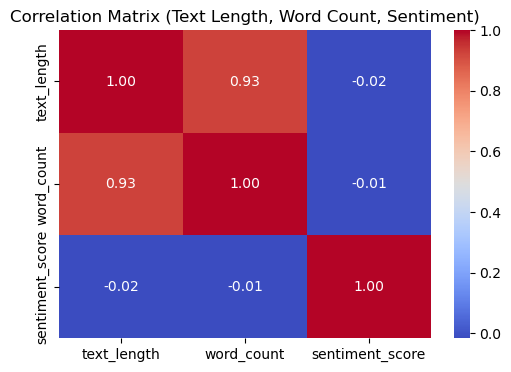

In [22]:

# Buat fitur numerik tambahan
df['text_length'] = df['normalized_text'].apply(len)
df['word_count'] = df['normalized_text'].apply(lambda x: len(x.split()))

# Konversi label sentimen ke angka
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentimen'].map(sentiment_map)

# Hitung korelasi
corr_matrix = df[['text_length', 'word_count', 'sentiment_score']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Text Length, Word Count, Sentiment)")
plt.show()


## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data csv yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [61]:
# Berikan Penjelasan tentang model yang dipilih
model_svc = LinearSVC(
    class_weight='balanced', 
    random_state=42, 
    max_iter=5000 
)

# Latih Model
model_svc.fit(X_train, Y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [64]:
# Prediksi dan Evaluasi
Y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("\n\n===== HASIL EVALUASI MODEL LINEAR SUPPORT VECTOR CLASSIFICATION (LinearSVC) =====")
print(f"Akurasi Model BARU: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=['neg (0)', 'pos (1)', 'neu (2)']))



===== HASIL EVALUASI MODEL LINEAR SUPPORT VECTOR CLASSIFICATION (LinearSVC) =====
Akurasi Model BARU: 0.9670

Classification Report:
              precision    recall  f1-score   support

     neg (0)       0.97      0.94      0.95     10841
     pos (1)       0.96      0.96      0.96     13497
     neu (2)       0.97      0.99      0.98     19905

    accuracy                           0.97     44243
   macro avg       0.97      0.96      0.96     44243
weighted avg       0.97      0.97      0.97     44243



In [23]:
import joblib
# Vektorisasi teks
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(df['normalized_text'])
# y = df['sentimen']

# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
print("=== Evaluasi Model SVM ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


# Simpan vectorizer dan model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

print("Model dan vectorizer berhasil disimpan!")


=== Evaluasi Model SVM ===
Akurasi: 0.9998982878453975


c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       1.00      1.00      1.00     29492
    Positive       0.00      0.00      0.00         2

    accuracy                           1.00     29495
   macro avg       0.33      0.33      0.33     29495
weighted avg       1.00      1.00      1.00     29495

Model dan vectorizer berhasil disimpan!


In [ ]:
from transformers import pipeline

# 1. Muat model BERT yang lebih baik untuk sentimen Twitter
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# 2. Ambil semua teks yang sudah dinormalisasi (dari cell 5a1d9101)
# Gunakan .tolist() agar lebih cepat diproses oleh pipeline
texts = df['normalized_text'].tolist()

# 3. Prediksi sentimen (mungkin butuh waktu beberapa menit)
# Gunakan batch_size untuk mempercepat jika Anda memiliki GPU
bert_results = sentiment_model(texts, batch_size=32) 

# 4. Buat mapping label
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

# 5. Buat kolom 'sentimen' baru berdasarkan hasil BERT
df['sentimen_bert'] = [label_map[r['label']] for r in bert_results]

# 6. Lihat distribusi baru (PASTI akan jauh lebih seimbang)
print("Distribusi Sentimen Baru (dari BERT):")
print(df['sentimen_bert'].value_counts())

Device set to use cpu


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------------------------------------
# 7. Tentukan "Kunci Jawaban" (Ground Truth)
#    !! SANGAT PENTING !!
#    Ganti 'sentimen_asli' dengan NAMA KOLOM di 'df' Anda
#    yang berisi label sentimen yang sebenarnya/manual.
# -----------------------------------------------------------------
NAMA_KOLOM_LABEL_ASLI_ANDA = 'sentimen_bert' # <-- GANTI INI
# -----------------------------------------------------------------

# Periksa apakah kolom-kolomnya siap
if NAMA_KOLOM_LABEL_ASLI_ANDA not in df.columns:
    print(f"ERROR: Kolom '{NAMA_KOLOM_LABEL_ASLI_ANDA}' tidak ditemukan di DataFrame.")
    print("Silakan ganti NAMA_KOLOM_LABEL_ASLI_ANDA di dalam kode Langkah 2.")
elif 'sentimen_bert' not in df.columns:
    print("ERROR: Kolom 'sentimen_bert' tidak ditemukan.")
    print("Pastikan Anda menjalankan Langkah 1 terlebih dahulu.")
else:
    # 8. Siapkan y_true (label sebenarnya) dan y_pred (label prediksi)
    true_labels = df[NAMA_KOLOM_LABEL_ASLI_ANDA]
    predicted_labels = df['sentimen_bert']

    # (Opsional: Lakukan standarisasi jika formatnya beda,
    #  misal 'positive' vs 'Positive'. Contoh:
    #  true_labels = true_labels.str.capitalize()
    # )

    # 9. Cetak Laporan Klasifikasi (Akurasi, Precision, Recall, F1)
    print("\n" + "="*50)
    print(f"Langkah 2 Selesai: Laporan Klasifikasi")
    print(f"(Membandingkan '{NAMA_KOLOM_LABEL_ASLI_ANDA}' vs. 'sentimen_bert')")
    print("="*50)
    
    # Ini adalah fungsi yang menghasilkan SEMUA metrik yang Anda minta
    print(classification_report(true_labels, predicted_labels, digits=4))
    
    # 10. Cetak Confusion Matrix
    print("\n" + "="*50)
    print("CONFUSION MATRIX:")
    print("="*50)
    # Baris = Label Sebenarnya, Kolom = Label Prediksi
    # (Pastikan 'labels' ini sesuai dengan isi data Anda)
    print(confusion_matrix(true_labels, predicted_labels, labels=["Positive", "Neutral", "Negative"]))

#### 5. Bert (Model Deep Learing)

In [ ]:
from transformers import pipeline

# Gunakan IndoBERT jika dataset berbahasa Indonesia
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Ambil beberapa contoh teks
sample_texts = df['normalized_text'].sample(10).tolist()

# Prediksi sentimen
results = sentiment_model(sample_texts)

# Gabungkan hasil
for text, result in zip(sample_texts, results):
    print(f"Teks: {text}\nSentimen: {result['label']}, Skor: {result['score']:.4f}\n")


Device set to use cpu


Teks: if you are wearing a face diaper it means you are a dirty person your face diaper is making you sick and you don
Sentimen: LABEL_0, Skor: 0.9690

Teks: dont lose hope pray for the betterment of covid
Sentimen: LABEL_2, Skor: 0.6560

Teks: air nz staff isolating after covid exposure
Sentimen: LABEL_1, Skor: 0.6804

Teks: billion corona virus vaccine doses have now been administered worldwide all thanks to medical teams who are re
Sentimen: LABEL_2, Skor: 0.6733

Teks: is open for covid vaccinations walk in or schedule appointment walkins monfri ampm di
Sentimen: LABEL_1, Skor: 0.9516

Teks: covid zero daily coronavirus deaths reported in england scotland and northern ireland uk news sky news
Sentimen: LABEL_0, Skor: 0.5902

Teks: i reject this idea that only trump suspected the chinese gov of foul play concerning the origin of covid in r
Sentimen: LABEL_0, Skor: 0.6914

Teks: rt as a mark of respect amp gratitude towards the frontline warriors working in svbph amp base hospital de

##### Perandingkan hasil kedua model
Model ini dari Cardiff NLP, dilatih khusus untuk tweet bahasa Inggris (sama seperti dataset kamu!)
Label-nya:

1. LABEL_0: Negative
2. LABEL_1: Neutral
3. LABEL_2: Positive

In [26]:

# Ambil subset kecil biar cepat
subset = df.sample(100, random_state=42).copy()

# SVM prediction
subset['svm_pred'] = svm_model.predict(vectorizer.transform(subset['normalized_text']))

# BERT prediction
bert_results = sentiment_model(subset['normalized_text'].tolist())
subset['bert_pred'] = [r['label'] for r in bert_results]

# Bandingkan hasil
print(subset[['normalized_text', 'svm_pred', 'bert_pred']].head(10))


                                                                                                             normalized_text  \
114953                                                                                                rt covid made in china   
47412     rt j k dutt man who lead nsg during mumbai attack died due to covid complications he had famously said i wish i ha   
10507                                                          friends who met at u of a student paper pen book during covid   
104918  rt joints for jabs adults in washington state can claim a free marijuana joint when they receive a covid vaccine the   
36471      in april the american college health association formally recommended colleges mandate the shot warning that scho   
110550         atlantic university sport optimistic athletes can return to fields rinks arenas and tracks starting this fall   
93466                                                                             eco cherry cherry toma

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confussion Matrix

<Figure size 800x600 with 0 Axes>

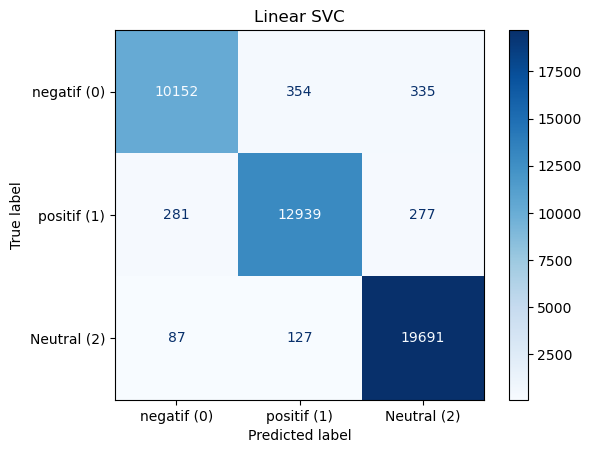


 Confusion Matrix berhasil dibuat dan ditampilkan.
Nilai mentah Confusion Matrix:
 [[10152   354   335]
 [  281 12939   277]
 [   87   127 19691]]


In [66]:
# 1. Confussion Matrix 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Hitung Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# 2. Definisikan Nama Label 
labels = ['negatif (0)', 'positif (1)', 'Neutral (2)']

# 3. Tampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Linear SVC')
plt.show()

print("\n Confusion Matrix berhasil dibuat dan ditampilkan.")
print("Nilai mentah Confusion Matrix:\n", cm)




#### 2. Laporan Klasifikasi

In [67]:
# 2. Laporann Klasifikasi (Classification report)
from sklearn.metrics import classification_report

# Mendefinisikan Nama Label
target_names = ['Negatif (0)', 'Positif (1)', 'Neutral (2)']

print("\n===== LAPORAN KLASIFIKASI MODEL Linear SVC =====")
print(classification_report(Y_test, Y_pred, target_names=target_names))

print(" Laporan Klasifikasi berhasil dibuat.")


===== LAPORAN KLASIFIKASI MODEL Linear SVC =====
              precision    recall  f1-score   support

 Negatif (0)       0.97      0.94      0.95     10841
 Positif (1)       0.96      0.96      0.96     13497
 Neutral (2)       0.97      0.99      0.98     19905

    accuracy                           0.97     44243
   macro avg       0.97      0.96      0.96     44243
weighted avg       0.97      0.97      0.97     44243

 Laporan Klasifikasi berhasil dibuat.


## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 
Data baru perkalimat 

#### Data Prediksi dengan Machine Learning

In [72]:
# Contoh data baru
data_baru = [
    "Finally got my covid vaccine today! Feeling great.",
    "Lockdowns are so frustrating and useless.",
    "Hospitals are doing their best to handle the crisis."
]

df_baru = pd.DataFrame({'tweet_baru': data_baru})


In [74]:
# 1. Cleaning
df_baru['tweets_clean'] = df_baru['tweet_baru'].apply(clean_text)

# 2. Stopword Removal
df_baru['tweets_final'] = df_baru['tweets_clean'].apply(remove_stopwords_and_finalize)

# 3. Lemmatization (Normalisasi Akhir)
df_baru['tweets_lemmatized'] = df_baru['tweets_final'].apply(perform_lemmatization)

print(" Data baru telah diproses.")

 Data baru telah diproses.


In [77]:
# 1. Vektorisasi Data Baru
X_new = df_baru['tweets_lemmatized']
X_new_vectorized = vectorizer.transform(X_new)

# 2. Prediksi Menggunakan Model MNB
Y_pred = model_svc.predict(X_test)

# 3. Konversi Prediksi Numerik ke Label Teks 
reverse_mapping = {1: 'positif (Positif)', 0: 'negatif (Negatif)', 2: 'neutral (Netral)'}
predictions_numeric = model_svc.predict(X_new_vectorized)

# 4. Tampilkan Hasil
predictions_label = [reverse_mapping[p] for p in predictions_numeric]
df_baru['Sentimen Prediksi'] = predictions_label

print("\n===== HASIL PREDIKSI DATA BARU =====")
print(df_baru[['tweet_baru', 'Sentimen Prediksi']])


===== HASIL PREDIKSI DATA BARU =====
                                          tweet_baru  Sentimen Prediksi
0  Finally got my covid vaccine today! Feeling gr...  positif (Positif)
1          Lockdowns are so frustrating and useless.  negatif (Negatif)
2  Hospitals are doing their best to handle the c...  positif (Positif)


##### 2. Data dari kaggle yang sama

##### A. Menggunakan Model Machine Learning

In [79]:
import pandas as pd

# 1. Load dataset yang sama
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df = pd.read_csv(file_path)

# 2. Pastikan kolom teks yang ingin diprediksi tersedia
kolom_teks = 'original_text'  # ganti sesuai kolom teks di dataset kamu
df['tweets_lemmatized'] = df[kolom_teks].astype(str)

# 3. Vektorisasi teks (menggunakan vectorizer dari model yang sudah dilatih)
X_all_vectorized = vectorizer.transform(df['tweets_lemmatized'])

# 4. Prediksi dengan model yang sudah dilatih
predictions_numeric = model_svc.predict(X_all_vectorized)

# 5. Ubah hasil numerik ke label teks
reverse_mapping = {
    1: 'positif (Positif)',
    0: 'negatif (Negatif)',
    2: 'neutral (Netral)'
}
predictions_label = [reverse_mapping[p] for p in predictions_numeric]

# 6. Simpan hasil prediksi ke dataframe
df['Sentimen Prediksi'] = predictions_label

# 7. Tampilkan beberapa hasil
print("\n===== HASIL PREDIKSI DATASET =====")
print(df[[kolom_teks, 'Sentimen Prediksi']].head(10))



===== HASIL PREDIKSI DATASET =====
                                       original_text  Sentimen Prediksi
0  RT @GlblCtzn: .@priyankachopra is calling on l...  positif (Positif)
1  RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...  positif (Positif)
2  RT @AdvoBarryRoux: These 5 police officials ba...  positif (Positif)
3  RT @MobilePunch: COVID-19: Oyo discharges two ...   neutral (Netral)
4  My Condolences to the Family of those who did ...   neutral (Netral)
5  RT @DrJMZimmerman: I received this text from m...   neutral (Netral)
6  Taiwan's Vice-President Chen Chien-jen on his ...  negatif (Negatif)
7  RT @morethanmySLE: BREAKING: A New York woman ...  negatif (Negatif)
8  Horrible tragedy in Nova Scotia today. How wil...   neutral (Netral)
9  @TahirsyeedK @sagarikaghose Covid-19 can be cu...   neutral (Netral)


#### Virtualisasi

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_14676\209554401.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


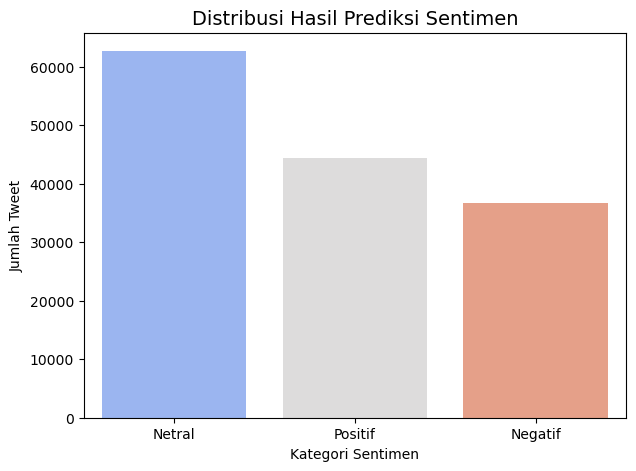

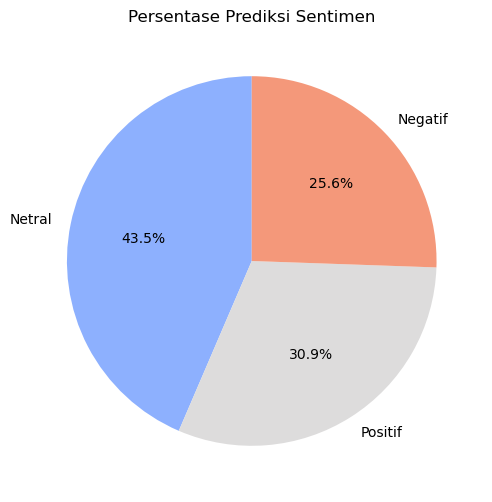

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca dataset yang sama
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df = pd.read_csv(file_path)

# 2. Pastikan teks sudah diproses seperti sebelumnya
kolom_teks = 'original_text'
df['tweets_lemmatized'] = df[kolom_teks].astype(str)

# 3. Vektorisasi & Prediksi
X_all_vectorized = vectorizer.transform(df['tweets_lemmatized'])
predictions_numeric = model_svc.predict(X_all_vectorized)

# 4. Ubah hasil numerik ke label teks
reverse_mapping = {1: 'Positif', 0: 'Negatif', 2: 'Netral'}
df['Sentimen Prediksi'] = [reverse_mapping[p] for p in predictions_numeric]

# 5. Hitung jumlah tiap kategori
sentiment_counts = df['Sentimen Prediksi'].value_counts()

# 6. Visualisasi menggunakan Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribusi Hasil Prediksi Sentimen', fontsize=14)
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

# 7. (Opsional) Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', 3))
plt.title('Persentase Prediksi Sentimen')
plt.show()
